In [20]:
import pandas as pd
import numpy as np
import os
import urllib
import tarfile
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#IMPORT DATA
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [13]:
hs=load_housing_data()
print(hs.info())
hs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [17]:
hs["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
hs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


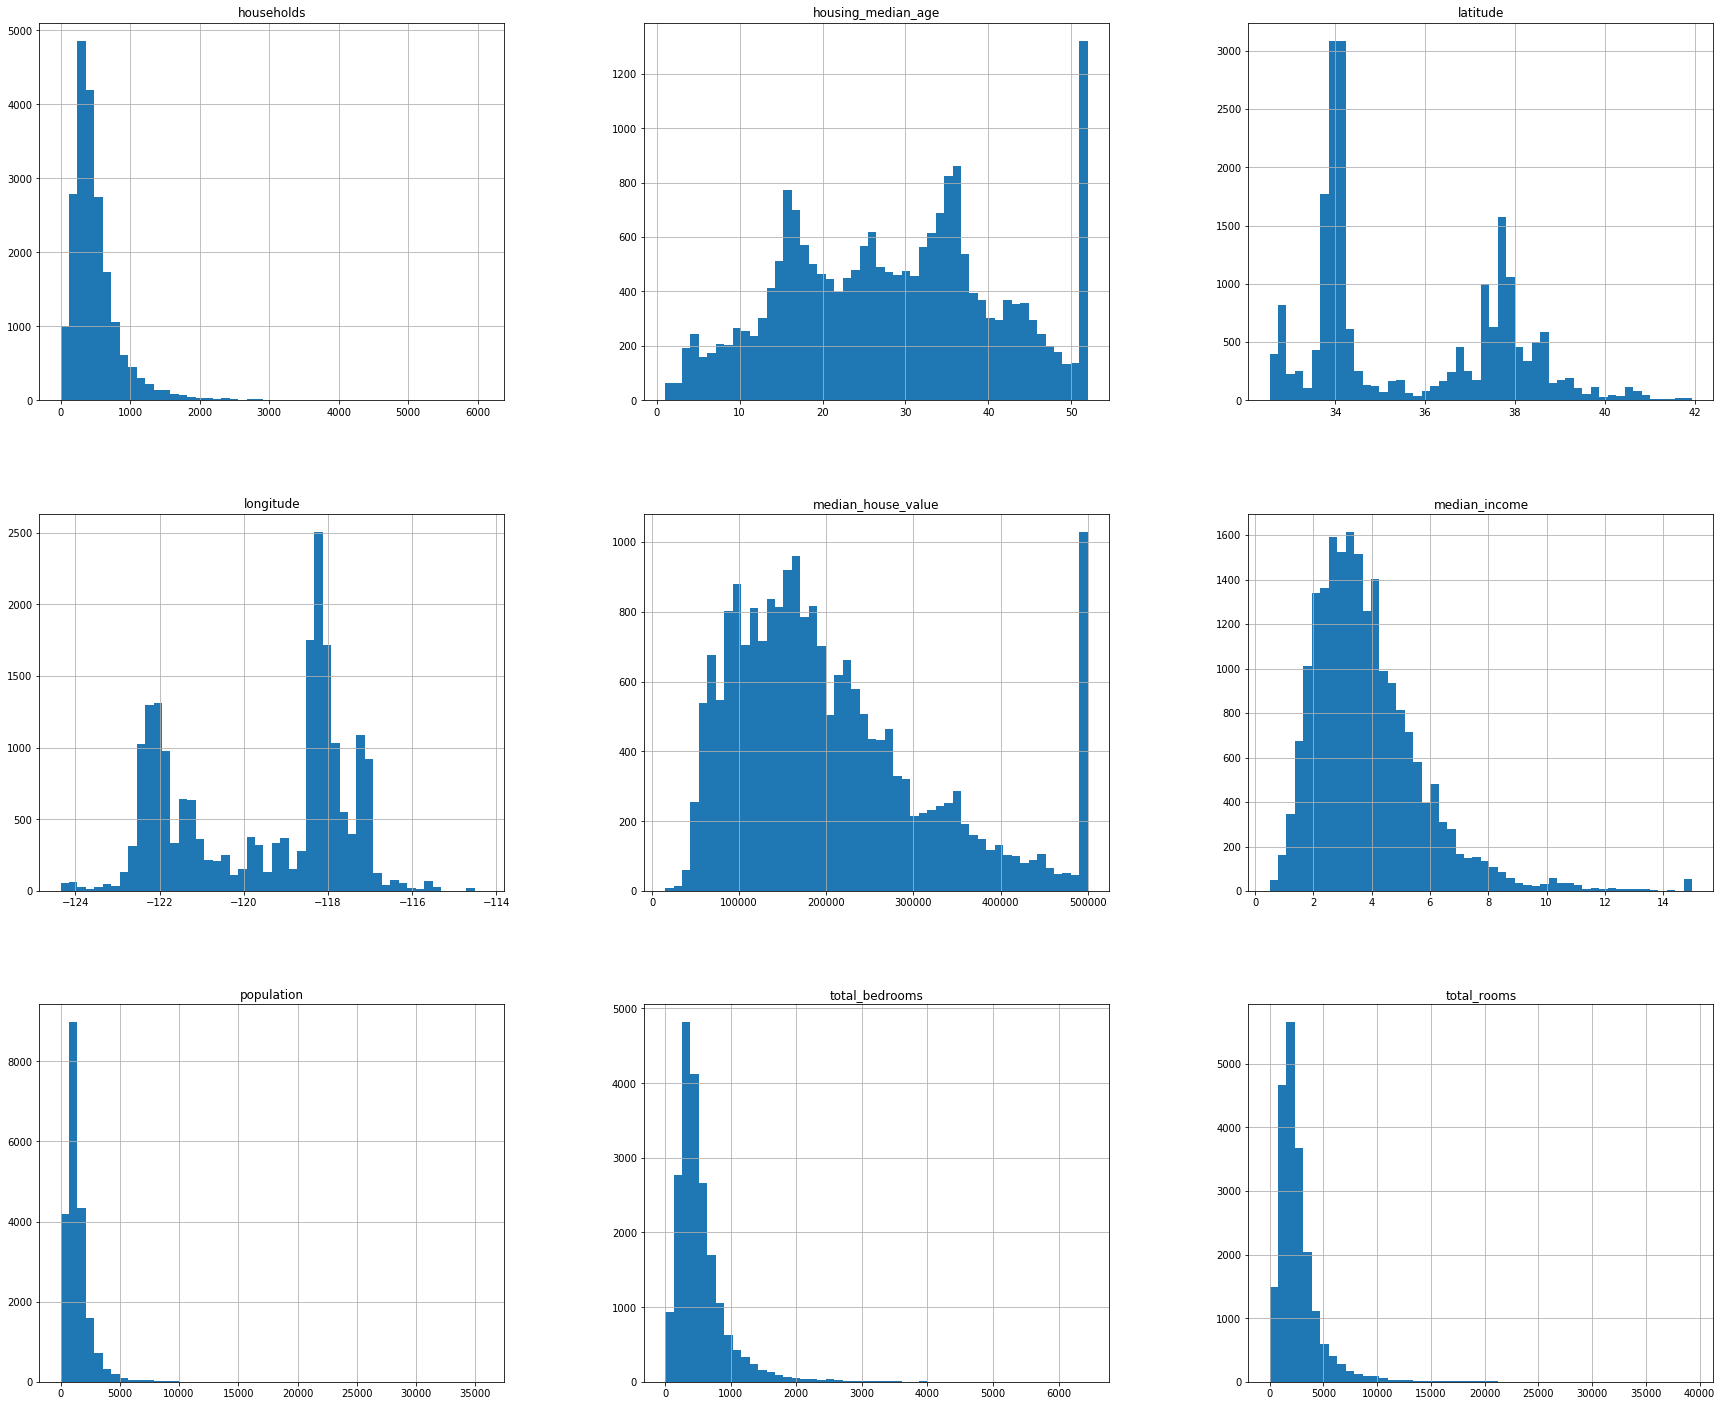

In [23]:
hs.hist(bins=50, figsize=(30,25))
plt.show()

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [27]:
#SEPARETE DATA INTO TRAIN AND TEST SETS For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]
train, test=split_train_test(hs, 0.2)
print(len(train))
print(len(test))

16512
4128


In [28]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [31]:
#IDENTIFICAÇÃO PELO INDICE (PODE OCORRER PROBLEMAS QUANDO APAGAR OU ADICIONAR LINHAS)
hs_with_id = hs.reset_index()   # adds an `index` column
train, test = split_train_test_by_id(hs_with_id, 0.2, "index")

In [32]:
#IDENTIFICAÇÃO UNICA A PARTIR DE PROPRIEDADES DE CADA LINHA
hs_with_id["id"] = hs["longitude"] * 1000 + hs["latitude"]
train, test = split_train_test_by_id(hs_with_id, 0.2, "id")

In [36]:
#THIS ONE
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hs, test_size=0.2, random_state=42)

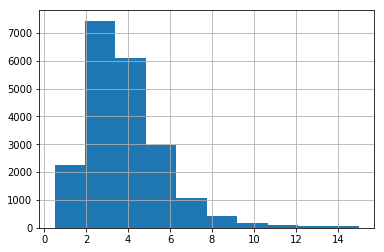

In [37]:
hs["median_income"].hist()

In [42]:
#DIVIDE THE INCOME VALUES INTO 5 CATEGORIES
hs["inc_cat"]=pd.cut(hs["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
hs.inc_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: inc_cat, dtype: int64


3    7236
2    6581
4    3639
5    2362
1     822
Name: inc_cat, dtype: int64

In [50]:
hs["inc_cat"].value_counts()/len(hs)*100

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: inc_cat, dtype: float64

In [47]:
#GENERATE A RANDOM TEST/TRAINING GROUP WEIGHTED BY THE INCOME CATEGORIES TO AVOID BIASES
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hs, hs["inc_cat"]):
 strat_train_set = hs.loc[train_index]
 strat_test_set = hs.loc[test_index]

In [49]:
#SAME PROPORTION AS THE FULL DATA
strat_test_set["inc_cat"].value_counts()/len(strat_test_set)*100

3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: inc_cat, dtype: float64

In [54]:
#WE'VE ONLY ADDED THE INC_CAT TO BE ABE TO CORRECTLY WEIGH THE TEST SET WITH THE INCOME, NOW WE CAN REMOVE IT
for set_ in (strat_train_set, strat_test_set):
    set_.drop("inc_cat", axis=1, inplace=True)

In [56]:
#NOW WE ARE GOING TO RESERVE THE TEST SET AND WORK ONLY WITH THE TRAINING SET
hs=strat_train_set.copy()

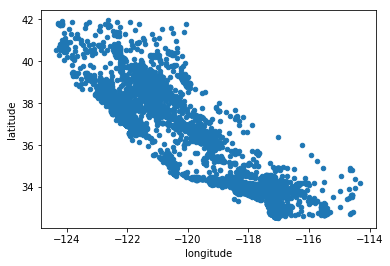

In [63]:
#PLOTTING THE LOCATION OF THE HOUSES ACCORDING TO THEIR LONGITUDE AND LATITUDE
hs.plot(kind="scatter", x="longitude", y="latitude")

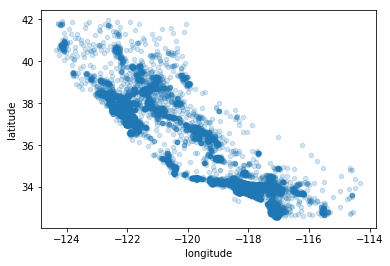

In [62]:
# ALPHA CHANGES THE DENSITY OF THE PLOT
hs.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

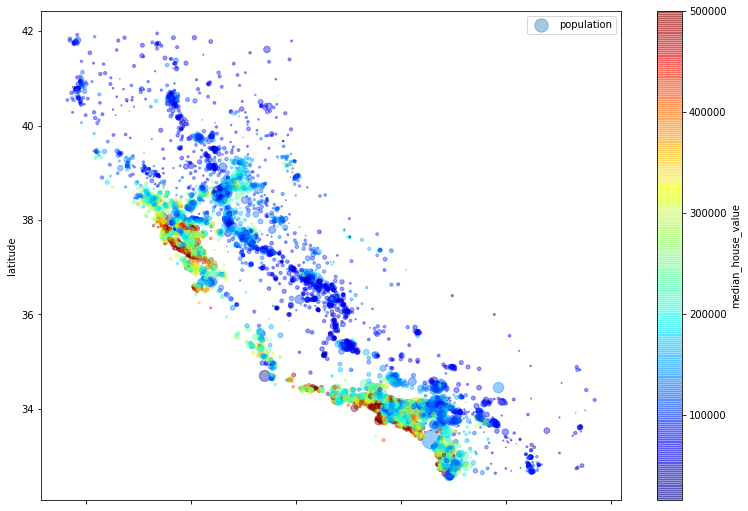

In [68]:
# S REGULATES THE  DOT SIZE AND THE COLLORS REFLEC THE PRICE
hs.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=hs["population"]/100, label="population", figsize=(13,9),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [72]:
#PEARSON'S CORRELATION COEFFICIENT, LINEAR CORRELATIONS
corr=hs.corr()

In [74]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D21AA5828>,
      dtype=object)

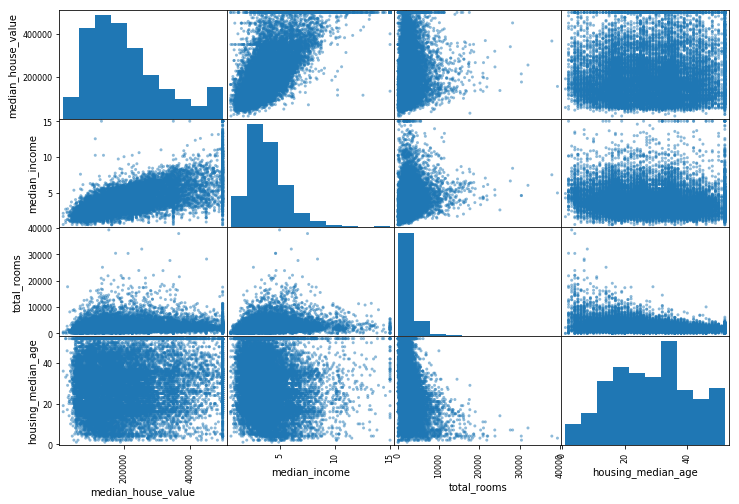

In [76]:
#PLOTTING ATTRIBUTES AGAINST EACH OTHER
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(hs[attributes], figsize=(12, 8))

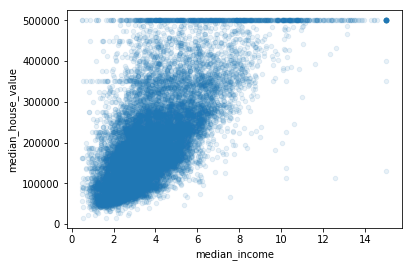

In [77]:
hs.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [25]:
a=["aa", "bb", "cc"]

In [26]:
for n in a:
    print(n)

aa
bb
cc


In [33]:
for i in range(1,100):
    if (i % 3 == 0) & (i % 5 == 0):
        print(i)

15
30
45
60
75
90


In [209]:
class jetpack:
    def __init__(self, name, color, max_size = 2, fuel = 10): # This function is the constructor.
        self.name = name
        self.color = color
        self.contents = []
        self.max_size = max_size
        self.fuel = fuel
    def put(self, item):
        if len(self.contents) < self.max_size:
            self.contents.append(item)
        else:
            print("NO ROOM")
    def take(self, item):
        if item in self.contents:
            self.contents.remove(item)
        else:
            print("item nao localizado")
    def fly(self, aa):
        if aa > self.fuel:
            print("not enough fuel")
        else:
            self.fuel -= aa
            return(print(self.fuel, 'fuel remaining'))
        
    def dump(self):
        self.fly(self.fuel)
        while len(self.contents)>0:
                self.contents.pop(0)
            

In [210]:
bp1 = jetpack("Raian", "Blue")
print(bp1.contents)
bp1.put("a")
bp1.put("b")
bp1.put("c")
bp1.put("d")
bp1.put("e")

[]
NO ROOM
NO ROOM
NO ROOM


In [211]:
bp1.contents

['a', 'b']

In [212]:
bp1.fly(5)

5 fuel remaining


In [213]:
bp1.dump()
print(bp1.contents, bp1.fuel)

0 fuel remaining
[] 0


In [ ]:
bp1.__